# **Linear Regression With Regularization Methods**

This notebook demonstrates linear regression with regularization techniques:
1. Ridge Regression (L2 regularization) using the Normal Equation
2. Scikit-Learn's Ridge Regression (L2 regularization)
3. Scikit-Learn's Lasso Regression (L1 regularization)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

---

## **1. Data Generation**

Let's create linear data with Gaussian noise to demonstrate the regression models.


In [24]:
# Set parameters
np.random.seed(42)
n_samples = 200
true_slope = 5
true_intercept = 2
noise_level = 4

# Generate features (X) and target (y)
X = np.random.rand(n_samples, 1) * 10
gaussian_noise = np.random.normal(0, noise_level, (n_samples, 1))

# True relationship and noisy observations
y_true = true_slope * X + true_intercept
y = y_true + gaussian_noise

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (200, 1), y shape: (200, 1)



### **Visualizing the Data**


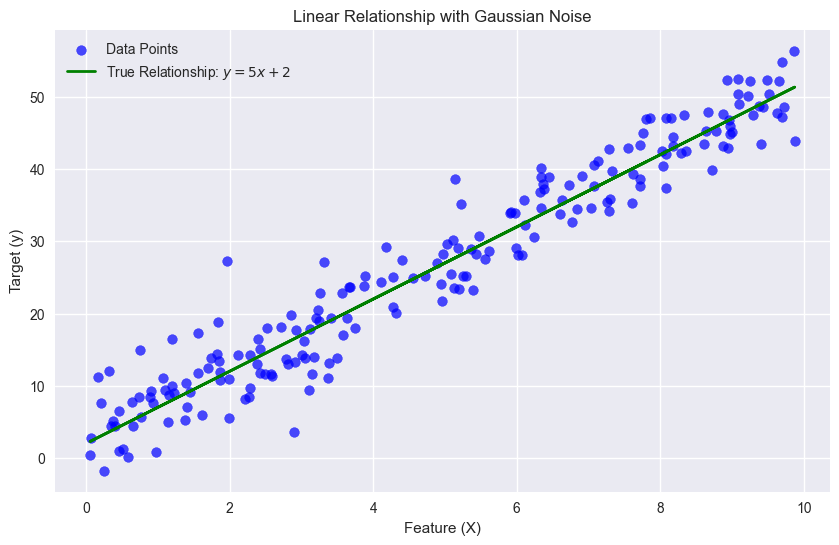

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Data Points", alpha=0.7)
plt.plot(
    X,
    y_true,
    color="green",
    linewidth=2,
    label=f"True Relationship: $y = {true_slope}x + {true_intercept}$",
)
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Relationship with Gaussian Noise")
plt.legend()
plt.grid(True)
plt.show()

---

## **2. Ridge Regression (Normal Equation)**


### **Mathematical Formulation**

**Objective Function:**

$$
J(\theta) = \frac{1}{2m} \underbrace{\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2}_\text{MSE} + \underbrace{\lambda \sum_{j=1}^n \theta_j^2}_\text{L2 Penalty}
$$

Where:
- $h_\theta(x^{(i)})$ is the predicted value
- $y^{(i)}$ is the true value
- $\theta_j$ are the model parameters
- $\lambda$ is the regularization parameter
- $m$ is the number of samples


**Closed-form Solution (Normal Equation):**

$$
\theta = (X^T X + \lambda I)^{-1} X^T y
$$

Where:
- $X$ is the feature matrix (with bias term)
- $y$ is the target vector
- $I$ is the identity matrix
- $\lambda$ controls the strength of regularization



---


**Effect of Changing Lambda (λ)**


| λ Value       | Effect on Ridge Model                            |
|---------------|--------------------------------------------------|
| **λ = 0**     | No regularization — behaves like Linear Regression. |
| **Small λ**   | Slight shrinkage of coefficients.                |
| **Large λ**   | Strong shrinkage — coefficients get smaller but not zero. Model becomes simpler. |
| **Very large λ** | Risk of **underfitting**, as model can't learn enough patterns. |

Ridge **shrinks** coefficients but **doesn't make them exactly zero**.


---

### **Implementation Using Normal Equation**

In [26]:
# Add bias term (column of ones) to X
X_b = np.c_[np.ones((n_samples, 1)), X]

In [27]:
def ridge_regression(X, y, lambda_=1.0):
    """
    Ridge Regression L2 using the Normal Equation
    Args:
        X (numpy.ndarray): Feature matrix (m x n)
        y (numpy.ndarray): Target vector (m x 1)
        lambda_ (float): Regularization parameter λ
    Returns:
        theta (numpy.ndarray): Weight vector (n x 1)
    """
    m, n = X.shape
    I = np.eye(n)  # Identity matrix of the size of number of features

    theta = np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y
    return theta

In [28]:
# Compute parameters
ridge_theta = ridge_regression(X_b, y, lambda_=0.1)

In [29]:
normal_intercept = ridge_theta[0][0]
normal_slope = ridge_theta[1][0]

print("Normal Equation Results:")
print(f"Intercept: {normal_intercept:.4f}")
print(f"Slope: {normal_slope:.4f}")
print(f"Function: y = {normal_slope:.4f}x + {normal_intercept:.4f}")

Normal Equation Results:
Intercept: 2.4177
Slope: 4.9692
Function: y = 4.9692x + 2.4177


In [30]:
# Make predictions
y_pred = X_b @ ridge_theta

### **Visualizing Ridge Regression Results**


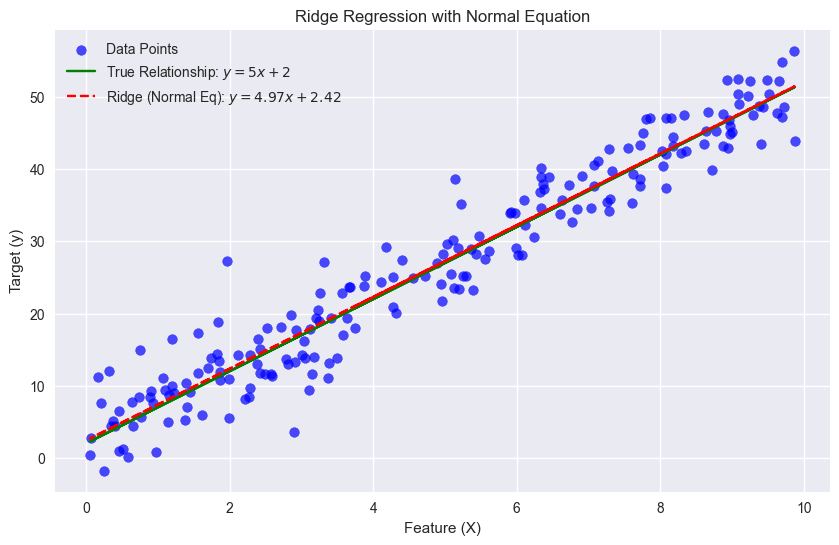

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Data Points", alpha=0.7)

# Plot true relationship
plt.plot(
    X,
    y_true,
    color="green",
    label=f"True Relationship: $y = {true_slope}x + {true_intercept}$",
)

# Plot predicted relationship
plt.plot(
    X,
    y_pred,
    color="red",
    linestyle="--",
    label=f"Ridge (Normal Eq): $y = {normal_slope:.2f}x + {normal_intercept:.2f}$",
)

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Ridge Regression with Normal Equation")
plt.legend()
plt.grid(True)
plt.show()

---


## **3. Ridge Regression (Scikit-Learn)**

In [32]:
from sklearn.linear_model import Ridge

In [33]:
# Initialize and fit model
ridge_model = Ridge(alpha=0.1)  # Note: alpha is λ in scikit-learn
ridge_model.fit(X, y)

Ridge(alpha=0.1)

In [34]:
# Get parameters
ridge_intercept = ridge_model.intercept_[0]
ridge_slope = ridge_model.coef_[0][0]

print("Scikit-Learn Ridge Results:")
print(f"Intercept: {ridge_intercept:.4f}")
print(f"Slope: {ridge_slope:.4f}")
print(f"Function: y = {ridge_slope:.4f}x + {ridge_intercept:.4f}")

Scikit-Learn Ridge Results:
Intercept: 2.4222
Slope: 4.9685
Function: y = 4.9685x + 2.4222


In [35]:
# Make predictions
y_pred_ridge = ridge_model.predict(X)

### **Visualizing Ridge Regression Results**


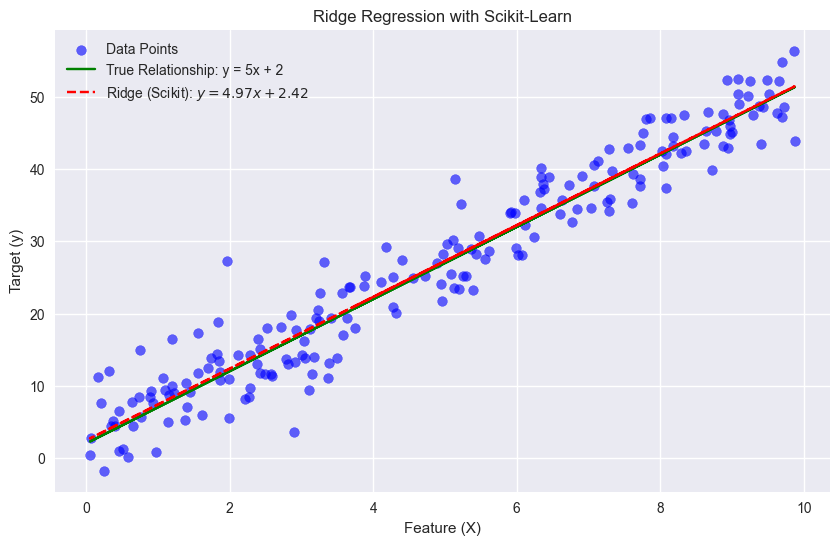

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Data Points", alpha=0.6)

# Plot true relationship
plt.plot(
    X,
    y_true,
    color="green",
    label=f"True Relationship: y = {true_slope}x + {true_intercept}",
)

# Plot predicted relationship
plt.plot(
    X,
    y_pred_ridge,
    color="red",
    linestyle="--",
    label=f"Ridge (Scikit): $y = {ridge_slope:.2f}x + {ridge_intercept:.2f}$",
)

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Ridge Regression with Scikit-Learn")
plt.legend()
plt.grid(True)
plt.show()

---

## **4. Lasso Regression (L1 Regularization)**


Lasso regression adds an L1 penalty term to the objective function, which can drive some coefficients to exactly zero, performing feature selection.

### **Mathematical Formulation**

- **Objective Function:**

$$
J(\theta) = \frac{1}{2m} \underbrace{\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2}_\text{MSE} + \underbrace{\lambda \sum_{j=1}^n |\theta_j|}_\text{L1 Penalty}
$$



- **No Closed-form Solution**

Because of the **absolute value** (non-differentiable at zero)

---

**Effect of Changing Lambda (λ)**

| λ Value       | Effect on Lasso Model                            |
|---------------|--------------------------------------------------|
| **λ = 0**     | No regularization — same as Linear Regression.   |
| **Small λ**   | Slight penalty — most features kept.             |
| **Large λ**   | Coefficients start turning **exactly to zero**, performing **feature selection**. |
| **Very large λ** | Too many features eliminated → **underfitting**. |

- Lasso not only shrinks coefficients — it can **eliminate** some features entirely (set weights to 0).


---

In [37]:
from sklearn.linear_model import Lasso

In [38]:
# Initialize and fit model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)

Lasso(alpha=0.1)

In [39]:
# Get parameters
lasso_intercept = lasso_model.intercept_[0]
lasso_slope = lasso_model.coef_[0]

print("Lasso Regression Results:")
print(f"Intercept: {lasso_intercept:.4f}")
print(f"Slope: {lasso_slope:.4f}")
print(f"Function: y = {lasso_slope:.4f}x + {lasso_intercept:.4f}")

Lasso Regression Results:
Intercept: 2.4767
Slope: 4.9572
Function: y = 4.9572x + 2.4767


In [40]:
# Make predictions
y_pred_lasso = lasso_model.predict(X)

### **Visualizing Lasso Regression Results**
 

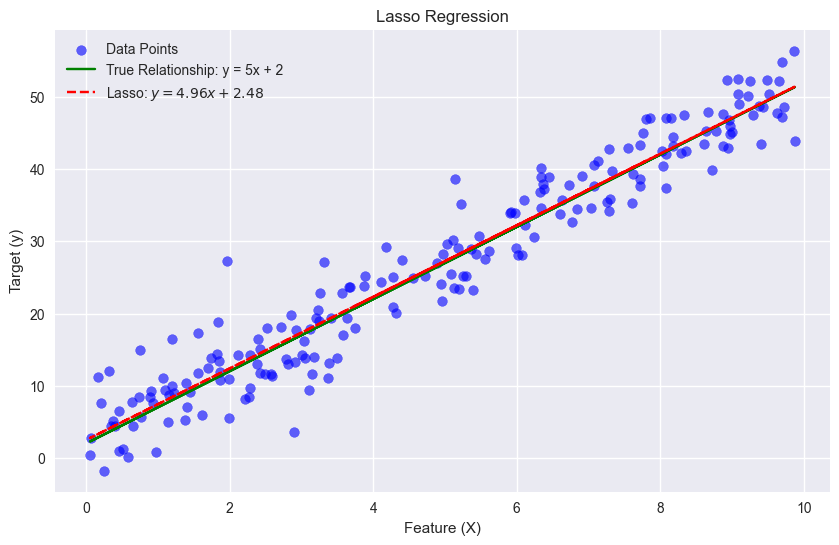

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Data Points", alpha=0.6)

# Plot true relationship
plt.plot(
    X,
    y_true,
    color="green",
    label=f"True Relationship: y = {true_slope}x + {true_intercept}",
)

# Plot predicted relationship
plt.plot(
    X,
    y_pred_lasso,
    color="red",
    linestyle="--",
    label=f"Lasso: $y = {lasso_slope:.2f}x + {lasso_intercept:.2f}$",
)

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Lasso Regression")
plt.legend()
plt.grid(True)
plt.show()

---

## **5. Model Evaluation**

Let's compare the performance of all models using the R-squared score, which measures the proportion of variance in the dependent variable that's predictable from the independent variable(s).


In [42]:
from sklearn.metrics import r2_score

In [43]:
# Calculate R-squared scores
r2_normal_ridge = r2_score(y, y_pred)
r2_ridge = r2_score(y, y_pred_ridge)
r2_lasso = r2_score(y, y_pred_lasso)

print("Model Performance Comparison:")
print(f"Ridge (Normal Equation): {r2_normal_ridge:.4f}")
print(f"Ridge (Scikit-Learn):    {r2_ridge:.4f}")
print(f"Lasso (Scikit-Learn):    {r2_lasso:.4f}")

Model Performance Comparison:
Ridge (Normal Equation): 0.9346
Ridge (Scikit-Learn):    0.9346
Lasso (Scikit-Learn):    0.9346


---

## **6. Comprehensive Visualization**

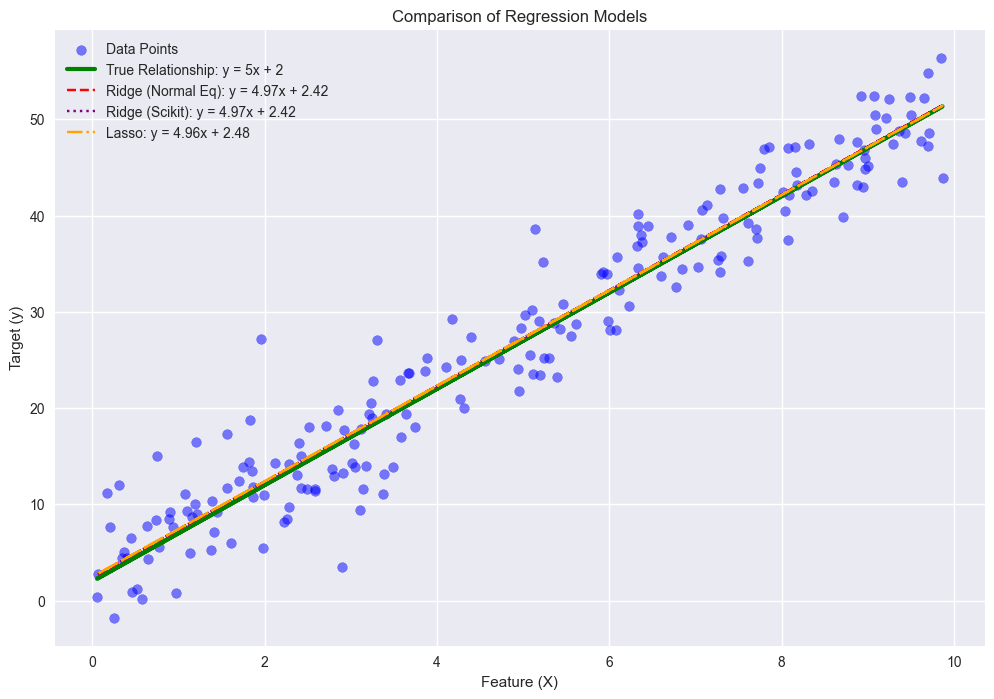

In [44]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color="blue", label="Data Points", alpha=0.5)

# Plot all models
plt.plot(
    X,
    y_true,
    color="green",
    linewidth=3,
    label=f"True Relationship: y = {true_slope}x + {true_intercept}",
)
plt.plot(
    X,
    y_pred,
    color="red",
    linestyle="--",
    label=f"Ridge (Normal Eq): y = {normal_slope:.2f}x + {normal_intercept:.2f}",
)
plt.plot(
    X,
    y_pred_ridge,
    color="purple",
    linestyle=":",
    label=f"Ridge (Scikit): y = {ridge_slope:.2f}x + {ridge_intercept:.2f}",
)
plt.plot(
    X,
    y_pred_lasso,
    color="orange",
    linestyle="-.",
    label=f"Lasso: y = {lasso_slope:.2f}x + {lasso_intercept:.2f}",
)

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Comparison of Regression Models")
plt.legend()
plt.grid(True)
plt.show()

---

## **7. Effect of Changing Lambda (λ) Summary**


|                 | Ridge                        | Lasso                           |
|-----------------|------------------------------|----------------------------------|
| Shrinks Weights |   Yes                       |   Yes                           |
| Eliminates Features |   No                  |   Yes (can set coef = 0)        |
| λ ↑             | More shrinkage, simpler model | More sparsity, fewer features   |
| λ ↓             | Closer to linear regression  | Less feature elimination         |


---